<h1>PCA（Principal Component Analysis）</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA<br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA

<h4>概要</h4>
まず、最も分散が大きい方向（第一成分）を見つける。データはこの方向に対して最も情報を持つ、つまり特徴量が最も相互に関係する方向である。
次に、第一成分と直交する方向の中から、最も分散が大きい方向を探す。
これを繰り返して見つけていく「方向」を、主成分と呼ぶ。一般には、もとの特徴量と同じ数だけ主成分が存在する。<br>
言い換えると、PCAはまずデータにもっとも近接する超平面を見つけ、そこにデータを射影する。分散を最大限に維持する軸へ射影することが最も情報の損失が少なくなるので、合理的に感じられる。この選択は、元のデータセットと軸への射影との平均二乗距離がもっとも近くなる軸だという理由からも良いと考えられる。

訓練セットの主成分を見つけるには、訓練セット行列$X(=m×n)$を$U\Sigma V^T$の3行列のドット積に分解できる特異値分解という標準的な行列分解テクニックを使う。ここで$V$に主成分を定義する単位ベクトルが含まれている。$V=(c_1, c_2, ...,c_n)$<br>
PCAは、データセットが原点を中心としてセンタリングされていることを前提としているため、自分でPCAを実装する場合や、ほかのsklearn以外のライブラリを使うときには、まずデータをセンタリングすることを忘れてはならない。sklearnのPCAクラスは、自動でデータのセンタリングを行ってくれる。

主成分のうちいくつかだけを残すことで、PCAを次元削減に使うこともできる。<br>
言い換えると、全ての主成分が見つかったら、最初のd個の成分が定義する超平面に射影すれば、データセットをd次元に次元削減できる。<br>
訓練セットを超平面に射影し、d次元に削減されたデータセット$X_{d-proj}$を得るためには、訓練セット行列$X$と行列$W_d$の間で行列の乗算を行う。$W_d$は、$V$の最初のd列を含む行列である。$X_{d-proj}=XW_d$

<h4>基本のメソッド</h4>
PCA変換の学習と適用は、PCAオブジェクトを生成し、<b>fit()</b>メソッドを呼び出して主成分を見つけ、<b>transform()</b>メソッドを呼んで回転と次元削減を行う。
デフォルトでは、PCAはデータの回転（とシフト）しか行わず、すべての主成分を維持する。
データの次元削減を行うには、PCAオブジェクトを作る際に、維持する主成分の数（<b>n_components</b>）を指定する必要がある。<br>
次元削減の結果、データ容量は通常大きく削減される。

<h4><b>components_</b>属性</h4>
主成分は特徴量値の線形結合であり、PCAの適合を行う過程で、<b>components_</b>属性に格納される。
<b>components_</b>のそれぞれの行が1つの主成分に対応し、列は、PCA変換する前のもとの特徴量に対応する。
行は重要度によってソートされている（第一主成分が最初に来る）<br>
<b>components_</b>属性には、$W_d$の転置行列が含まれている

<h4><b>explained_variance_ratio_</b>属性</h4>
<b>explained_variance_ratio_</b>属性から得られる個々の主成分の因子寄与率も重要な情報である。この値は、個々の主成分に沿ったデータセットの分散の分散全体対する割合を示す。<br>
次数をいくつまで削減するかを無作為に選択するよりも、各次元に沿った因子寄与率の合計が十分な割合（例えば95%）になるように次数を選ぶ方が単純である。もちろん、可視化のために次元削減する場合は2,3次元を選ぶ必要があるだろう。<br>
<b>n_components</b>の値として、維持したい主成分の数を指定するのではなく、維持したい分散の割合を示す0.0から1.0までの間の浮動小数点を設定することで、それを満たす主成分の数まで次元削減が行われる。

<h4>PCA射影の逆変換</h4>
PCA射影の逆変換を行えば、次元削減されたデータセットを削減前の次元に再構築することもできる（もちろん情報を喪失しているので完全とはいかない）。オリジナルデータと再構築されたデータの平均二乗距離を再構築誤差と呼ぶ。メソッドは<b>inverse_transform()</b>メソッド<br>
$X_{recovered}=X_{d-proj}W^T_d$

<h4><b>whiten</b>オプション</h4>
PCAの<b>whiten</b>オプションを用いると、主成分が同じスケールになるようにスケール変換する。PCAによる変換後にStandardScalerをかけるのと同じである

<h4>ランダム化PCA</h4>
PCAオブジェクトを作成する際に、svd_solverを"randomized"にすると、sklearnは最初のd個の主成分の概数を高速に見つけ出してくるランダム化PCAという確率的アルゴリズムを使う。dがnよりもかなり小さい時には大幅に高速になる。<br>
実は、svd_solverのデフォルトは"auto"になっており、sklearnはmかnが500よりも大きく、dがmかnの80%よりも小さければ、自動的にランダム化PCAアルゴリズムを使い、特異値分解を使うのはそれ以外の場合だけである。sklearnに特異値分解を強制したい場合には、svd_solverに"full"を指定する

<h4>逐次学習型PCA</h4>
上記のPCAの実装には、訓練セット全体がメモリに納まっていなければアルゴリズムを実行できないという問題がある。幸い、訓練セットをミニバッチに分割し、一度に一つずつミニバッチを渡していくことができる逐次学習型PCA（Incremental PCA）というアルゴリズムが開発されている。これは大規模な訓練セットを相手にするときや、PCAをオンライン実行（新しいインスタンスが届いたときにその場で実行）したいときに役立つ<br>
実現には、Numpyのarray_split()関数でデータセットをミニバッチに分割し、それをsklearnのIncrementalPCAクラスに渡して、個々のミニバッチを対象としてpartial_fit()メソッドを呼び出す

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

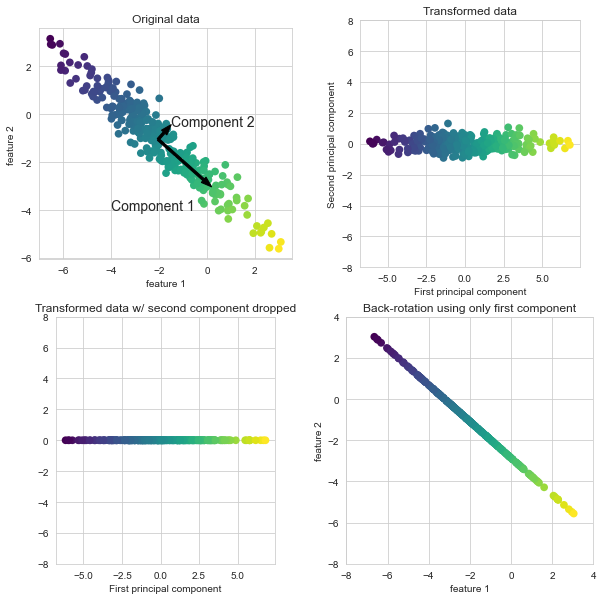

In [3]:
mglearn.plots.plot_pca_illustration()

<h3>cancerデータセットのPCAによる可視化</h3>

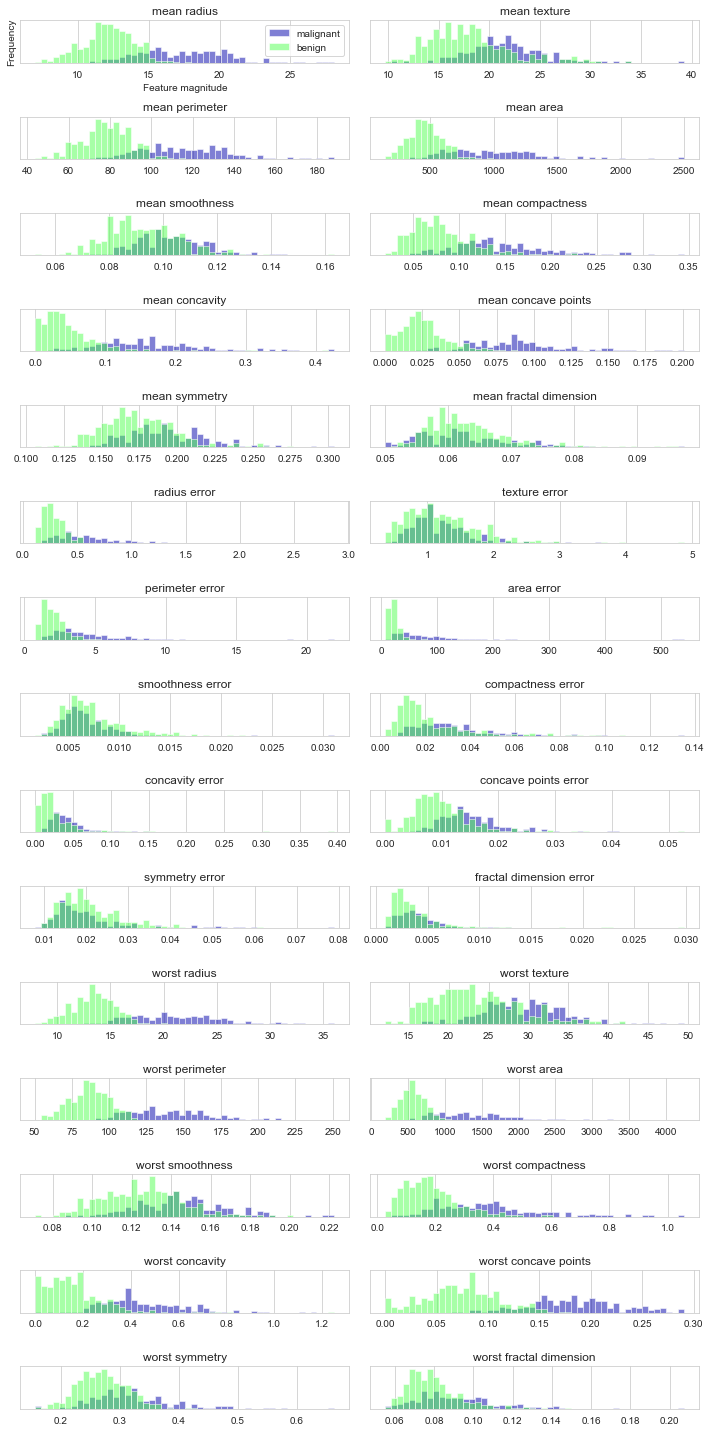

In [4]:
# まだPCAは使ってないよ
# 各特徴量のヒストグラムを陽性と陰性に分けて、表示
# 陽性と陰性のヒストグラムの重なっている部分が多い特徴量はあまり情報がないと言える
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"], loc = "best")
fig.tight_layout()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(f"Original shape: {str(X_scaled.shape)}")
print(f"Reduced shape: {str(X_pca.shape)}")

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

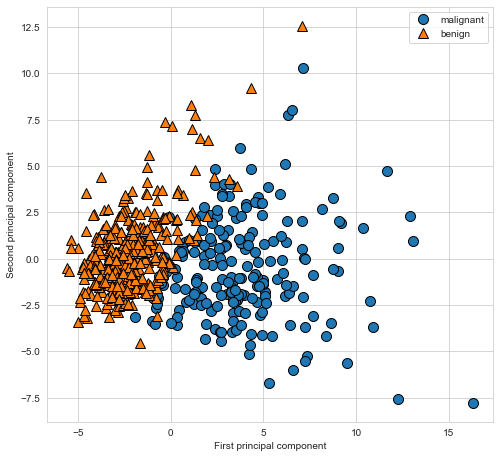

In [6]:
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [7]:
print(f"PCA component shape: {pca.components_.shape}")
print(f"PCA components:\n{pca.components_}")

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal cimponents')

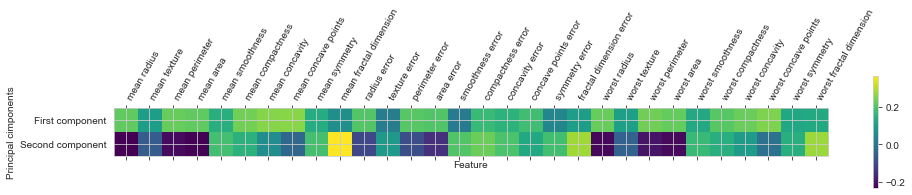

In [8]:
plt.matshow(pca.components_, cmap = "viridis")
plt.yticks([0,1], ["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = "left")
plt.xlabel("Feature")
plt.ylabel("Principal cimponents")

In [9]:
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_)

(2,)
[0.44272026 0.18971182]


In [10]:
pca = PCA(n_components = 0.95)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(f"Original shape: {str(X_scaled.shape)}")
print(f"Reduced shape: {str(X_pca.shape)}")
print(f"PCA component shape: {pca.components_.shape}")
#print(f"PCA components:\n{pca.components_}")
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_)

Original shape: (569, 30)
Reduced shape: (569, 10)
PCA component shape: (10, 30)
(10,)
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


<h3>固有顔による特徴量抽出</h3>

In [11]:
# 特徴量抽出の背後には、データには与えられたもともとの表現よりも、解析に適した表現があり、それを見つけることが可能だ、という考えがある
# 特徴量抽出が効果を持つアプリケーションとしては画像関連が挙げられる
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

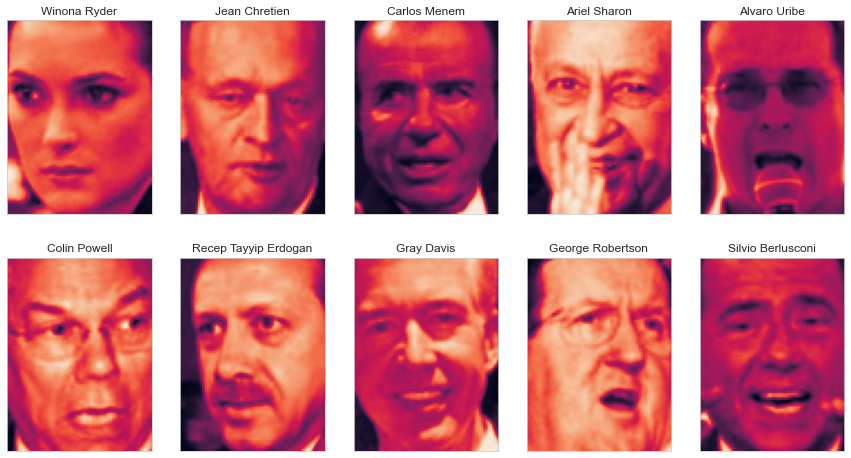

In [12]:
fix, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {"xticks":(),"yticks":()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
# 画像は3023枚あり、87*65px
print(f"people.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [14]:
# ジョージ・W・ブッシュとコリン・パウエルの画像が少し多いか
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f"{name:25} {count:3}", end = "    ")
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [15]:
# 偏りを減らすために、各人の画像を50に制限する（こうしないと、特徴量抽出がジョージやコリンの特徴に偏ってしまう）
mask = np.zeros(people.target.shape, dtype = np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

In [16]:
X_people = people.data[mask]
y_people = people.target[mask]

In [17]:
# 0から255で表現されている、グレースケールの値0と1の間に変換
X_people = X_people/255

In [18]:
# 1-knnでの精度は62クラス分類であることを考えればそれほど悪くないが（ランダムに選べば1/62=1.5%）、それほどよくもない
# そもそも、もとのピクセル空間で距離を計算するのは顔の近似度を測るのには全く適していない
# ピクセル表現で2つの画像を比較するということは、相互の画像の対応するピクセルの値を比較することとなる
# 例えば、ピクセルで距離を測ると、1ピクセル顔を右にずれすだけで、表現が全く変わってしまい、大きく変化したことになる
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test, y_test):.2f}")

Test set score of 1-nn: 0.23


X_train_pca.shape: (1547, 100)
Test set score of 1-nn: 0.31
pca.components_.shape: (100, 5655)


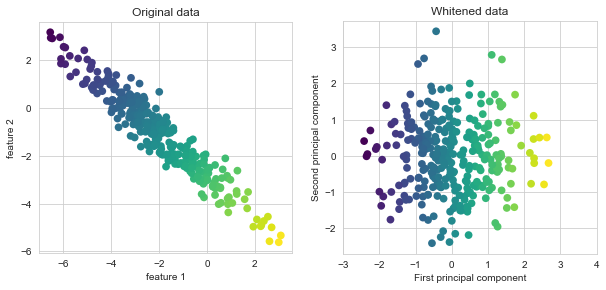

In [19]:
# 主成分に沿った距離を使うことで、精度が上げられないか試してみる
# 精度は向上し、このことは、主成分がデータのより良い表現となっているのではないかという直感を裏付けている
mglearn.plots.plot_pca_whitening()

pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"X_train_pca.shape: {X_train_pca.shape}")

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test_pca, y_test):.2f}")
print(f"pca.components_.shape: {pca.components_.shape}")

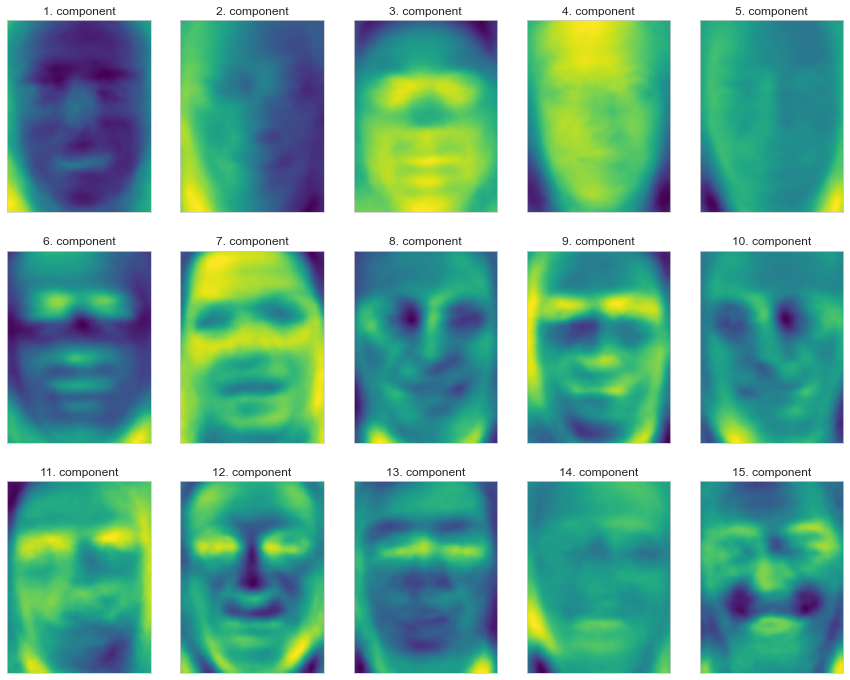

In [20]:
# 画像データについては、主成分が、入力空間の方向に対応するので、見つけた主成分を容易に可視化することができる

fix, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {"xticks":(),"yticks":()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = "viridis")
    ax.set_title(f"{i + 1}. component")

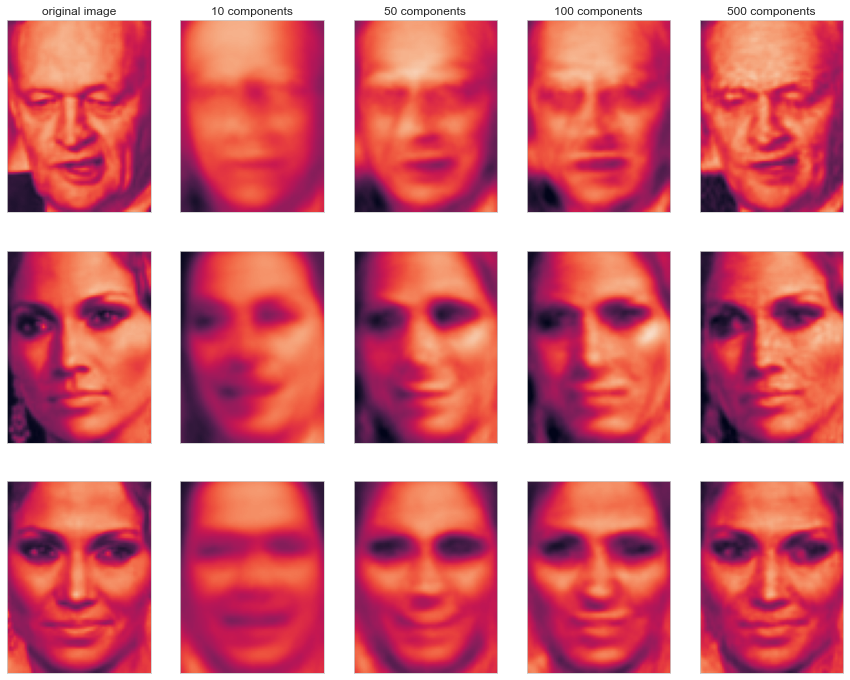

In [21]:
# PCAは、テストデータポイントを主成分の重み付き和として表現する、一連の数字（PCAで回転後の新しい特徴量）を見つける手法、という解釈がある
# 元の顔画像＝第一主成分×その係数＋第二主成分×その係数＋・・・
# この解釈を理解するために、主成分の一部だけを使って元画像を再現してみる
# 主成分のいくつかだけ残したものを逆回転してもとの空間に戻す。このもとの特徴空間へ戻す作業は、inverse_transformメソッドで行うことができる
# ピクセル数と同数の主成分を使うことは、回転後に情報をまったく落とさないことを意味し、画像は完全に再構成される

mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

In [22]:
X_test_recoverd_pca = pca.inverse_transform(X_test_pca)
print(f"X_test_pca.shape: {X_test_pca.shape}")
print(f"X_test_recoverd_pca.shape: {X_test_recoverd_pca.shape}")

X_test_pca.shape: (516, 100)
X_test_recoverd_pca.shape: (516, 5655)


Text(0, 0.5, 'Second principal component')

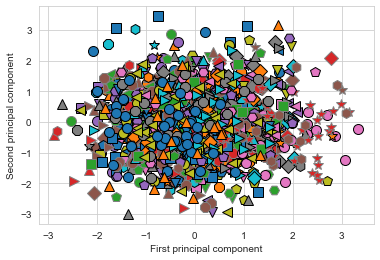

In [23]:
# 第一主成分と第二主成分だけでは、顔画像をクラス分類できそうにない。上記の10主成分を用いた顔画像の再構成でもボヤっとしているから当然だ

mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

<h3>逐次学習型PCA</h3>

In [24]:
# 思ったような精度が出ないな。逐次型だからwhitenがうまくきかないのか？
from sklearn.decomposition import IncrementalPCA

n_batches = 10
inc_pca = IncrementalPCA(n_components = 100, whiten = True)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_train_pca = inc_pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"X_train_pca.shape: {X_train_pca.shape}")

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print(f"Test set score of 1-nn: {knn.score(X_test_pca, y_test):.2f}")
print(f"pca.components_.shape: {pca.components_.shape}")

X_train_pca.shape: (1547, 100)
Test set score of 1-nn: 0.02
pca.components_.shape: (100, 5655)


<h1>カーネルPCA</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA

<h4>概要</h4>
カーネルトリックを応用して、PCAは次元削減のために複雑な非線形射影を実行できる。これを<b>カーネルPCA</b>という
（カーネルトリックによって作られる高次元特徴量での線形の決定境界は、オリジナル空間の複雑な非線形決定境界に対応している）<br>
ざっくりとは、通常のPCAは特徴量の線形結合によって主成分が作られたが、特徴量カーネルを交えた線形結合で主成分を作ることで、より複雑な次元削減（射影）を実現する<br>
sklearnでは、<b>KernelPCA</b>クラスで実装されている

<h4>カーネルとハイパーパラメータの選択（教師あり）</h4>
カーネルPCAは教師なし学習アルゴリズムなので、最良のカーネル、ハイパーパラメータ値を選択するために役立つ自明な性能指標はない。しかし、次元削減は教師あり学習タスク（例えば分類）の準備ステップになっていることが多いので、グリッドサーチを使ってそのタスクで最高の性能を引き出せるカーネルとハイパーパラメータを選べばよい

<h4>カーネルとハイパーパラメータの選択（教師なし）</h4>
再構築誤差が最も小さくなるカーネルとハイパーパラメータを選ぶという完全に教師なしの方法もある。しかし、再構築は、線形PCAほど簡単ではないため、再構築された点を計算することはできず、本当の再構築誤差を計算することはできない。しかし、再構築された点の近くにマッピングされるオリジナルの空間の点を見つけることはできる。これを再構築プレイメージと呼ぶ。このプレイメージと元のインスタンスとの二乗距離を測定し、その誤差が最小になるカーネルとハイパーパラメータを選べばよい

<h4>fit_inverse_transform=True</h4>
再構築は射影されたインスタンスを訓練セット、元のインスタンスをターゲットとして教師あり回帰モデルを訓練する。sklearnでは、<b>fit_inverse_transform=True</b>を指定すれば、自動的にやってくれる。デフォルトでは、fit_inverse_transform=Falseであり、KernelPCAはinverse_transform()メソッドを持たない。このメソッドが作られるのは、fit_inverse_transform=Trueを設定したときだけである。

<h4>パラメータ</h4>
kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’<br>
また、kernelに応じてそれぞれ異なるハイパーパラメータが存在する（例えば、kernel = "rbf"ならば、gamma）

In [25]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

In [26]:
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 2)
pca = pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

lr = LogisticRegression()
lr = lr.fit(X_train_reduced, y_train)
print(lr.score(X_test_reduced, y_test))

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
rbf_pca = rbf_pca.fit(X_train)
X_train_reduced = rbf_pca.transform(X_train)
X_test_reduced = rbf_pca.transform(X_test)

lr = LogisticRegression()
lr = lr.fit(X_train_reduced, y_train)
print(lr.score(X_test_reduced, y_test))

0.9230769230769231
0.9090909090909091


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components = 2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma":np.linspace(0.03, 0.05, 10),
    "kpca__kernel":["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))

{'kpca__gamma': 0.03888888888888889, 'kpca__kernel': 'sigmoid'}
0.9020979020979021


In [28]:
from sklearn.metrics import mean_squared_error

best_params = {"gamma":0.038, "kernel":"sigmoid"}
sigmoid_pca = KernelPCA(n_components = 2, **best_params, fit_inverse_transform = True)
X_reduced = sigmoid_pca.fit_transform(X_train)
X_preimage = sigmoid_pca.inverse_transform(X_reduced)
print(mean_squared_error(X_train, X_preimage))

0.5292769730497767
